In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload 
%autoreload 2

In [2]:
#testing replay buffer
from lib.ReplayBuffer import *
test = 0

def generate_sample():
    return np.random.rand(4)

rep = ReplayBuffer(5)

for i in range(10):
    s = generate_sample()
    s, a, r, sn = s[0], s[1], s[2], s[3]
    rep.experience(s, a, r, sn)
    
if test:
    for i in range(5):
        print(rep.sample_minibatch(3))


In [3]:
from lib.DQN import *
import tensorflow as tf

def generate_config(input_dim, action_count, layers, update, discount, lr, reg):
    config = {'input_shape':(None, input_dim), 
              'action_count':action_count, 
              'layers':layers, 
              'update': update,
              'discount':discount,
             'lr':lr,
             'reg':reg}
    
    return config

if test:
    config = {'input_shape':(None, 3), 
              'action_count':2, 
              'layers':['fc', (None, 20), 
                        'fc', (None, 10)], 
              'update': 1000,
              'discount':0.99,
             'lr':1e-3}

    dqn = DQN(config)

    dqn.update_target()

    d = 5
    X = np.random.randn(d, 3), np.random.choice(2,d), np.random.randn(d), np.random.randn(d, 3)

    print([w1.eval(session=dqn.session)-w2.eval(session=dqn.session) for w1, w2 in zip(dqn.target_weights, dqn.network_weights)])

    dqn.play(X)

    print([w1.eval(session=dqn.session)-w2.eval(session=dqn.session) for w1, w2 in zip(dqn.target_weights, dqn.network_weights)])


In [14]:

def downsample(image):
    # Take only alternate pixels - basically halves the resolution of the image (which is fine for us)
    return image[::2, ::2, :]

def remove_color(image):
    """Convert all color (RGB is the third dimension in the image)"""
    return image[:, :, 0]

def remove_background(image):
    image[image == 144] = 0
    image[image == 109] = 0
    return image

def preprocess_observations(input_observation):
    """ convert the 210x160x3 uint8 frame into a 6400 float vector """
    processed_observation = input_observation[35:195] # crop
    processed_observation = downsample(processed_observation)
    processed_observation = remove_color(processed_observation)
    processed_observation = remove_background(processed_observation)
    processed_observation[processed_observation != 0] = 1 # everything else (paddles, ball) just set to 1
    
    return processed_observation.reshape(80, 80, 1)

def generate_observation(observation1, observation2, observation3, observation4):
    return np.dstack((observation1, observation2, observation3, observation4))


In [11]:
#testing for cartpole
import gym
from gym import wrappers
import matplotlib.pyplot as plt

input_dim = 6
layers =  ['fc', (None, 128), 'fc', (None, 128)]
action_count = 2
update_region = 1000
discount = 0.99
lr = 1e-3
reg = 0

config = generate_config(input_dim, action_count, layers, update_region, discount, lr, reg)
num_episodes = 5000
num_steps = 5000
eps = 0.99
decay = 0.9995
batch_size = 10
buffer_size = 10000

replay = ReplayBuffer(buffer_size)
dqn = DQN(config)

env = gym.make('Acrobot-v1')
#env = wrappers.Monitor(env, '/tmp/xpol-dqn',force=True)

def policy(s):
    p = np.random.rand()
    a = dqn.max_q(s)[0]
    if p < eps:
        return 1-a
    else:
        return a


[2017-05-21 21:21:47,985] Making new env: Acrobot-v1


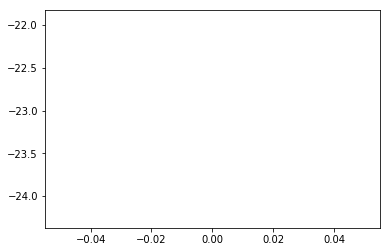

-23.099999999999994 -321.0 7.56407943758 0.01
Updating target
-94.28999999999998 -735.0 15.6127218899 0.01
Updating target
Updating target
Updating target
-370.9609999999999 -2861.0 21.7394391539 0.49999000005000005
Updating target
-427.3648999999999 -935.0 25.4144056342 0.4999850001499996
Updating target
-489.2284099999999 -1046.0 23.7253287978 0.4999800002999981
Updating target
-576.8055689999999 -1365.0 33.1005300812 0.49997500049999516
Updating target
Updating target
Updating target
Updating target
-911.0250120999999 -3919.0 32.6391748135 0.4999700007499902
Updating target
Updating target
Updating target
-1136.1225108899998 -3162.0 21.2478649564 0.4999650010499827
Updating target
Updating target
-1143.8102598009998 -1213.0 14.3530755653 0.4999600013999722
-1104.0292338208997 -746.0 18.4043092621 0.4999550017999582
Updating target
Updating target
-1189.5263104388096 -1959.0 22.06241167 0.49995000224994024
Updating target
-1139.3736793949286 -688.0 31.451491674 0.01
Updating target
U

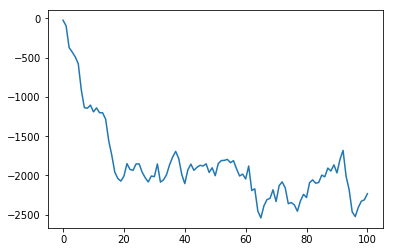

-2232.2747937132885 -1532.0 25.6494757852 0.49950024741917187
-2048.2473143419597 -392.0 24.5438017274 0.01
Updating target
Updating target
Updating target
-2064.022582907764 -2206.0 25.6580945357 0.4994902574641735
Updating target
Updating target
-2097.7203246169875 -2401.0 24.2015258739 0.4994852625615989
Updating target
Updating target
-2105.548292155289 -2176.0 22.8974151156 0.4994802677089733
Updating target
Updating target
-2040.39346293976 -1454.0 24.7013031964 0.49947527290629623
Updating target
Updating target
-2086.054116645784 -2497.0 21.210279732 0.4994702781535672
Updating target
-1951.7487049812055 -743.0 23.9438274207 0.49946528345078567
Updating target
Updating target
-1973.773834483085 -2172.0 25.4893303972 0.4994602887979512
Updating target
-1873.7964510347765 -974.0 30.2142304299 0.49945529419506324
Updating target
Updating target
-1858.916805931299 -1725.0 29.0664891879 0.4994502996421213
-1704.2251253381692 -312.0 28.4506574504 0.01
Updating target
Updating target


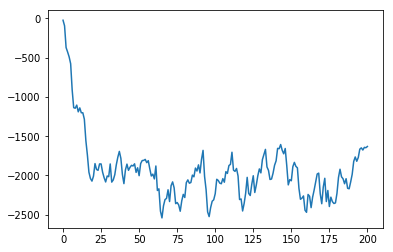

-1630.9519579930695 -1490.0 21.5948553768 0.4990009943436276
Updating target
-1497.9567621937624 -301.0 23.2984759717 0.01
Updating target
Updating target
-1574.4610859743862 -2263.0 19.5543195514 0.49899101437364085
Updating target
-1567.1149773769475 -1501.0 16.2342891392 0.49898602446349716
Updating target
Updating target
Updating target
-1623.5034796392526 -2131.0 16.3737138174 0.49898103460325255
Updating target
-1647.7531316753273 -1866.0 14.9910968443 0.4989760447929065
Updating target
Updating target
-1652.3778185077945 -1694.0 15.8199683061 0.49897105503245864
Updating target
Updating target
-1723.3400366570152 -2362.0 15.9593810724 0.49896606532190835
Updating target
Updating target
-1728.9060329913136 -1779.0 14.4862805992 0.49896107566125514
Updating target
Updating target
-1702.5154296921824 -1465.0 14.4995578752 0.49895608605049857
Updating target
Updating target
-1784.363886722964 -2521.0 11.9796706955 0.4989510964896381
Updating target
-1632.4274980506677 -265.0 10.9198

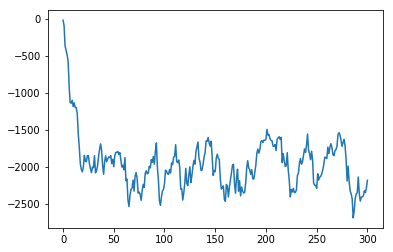

-2185.696834102577 -1249.0 20.21735216 0.4985022402741096
Updating target
-2016.5271506923195 -494.0 23.7912214126 0.01
Updating target
Updating target
-2038.4744356230876 -2236.0 23.7269737612 0.49849227027915444
Updating target
Updating target
-2026.5269920607789 -1919.0 19.2486119525 0.49848728535645165
Updating target
Updating target
Updating target
Updating target
Updating target
-2310.074292854701 -4862.0 17.9595507834 0.4984823004835981
Updating target
-2184.7668635692307 -1057.0 15.0451232654 0.4984773156605933
Updating target
Updating target
Updating target
Updating target
-2356.190177212308 -3899.0 14.7718137475 0.4984723308874367
Updating target
Updating target
Updating target
Updating target
Updating target
-2620.571159491077 -5000.0 14.7853297538 0.49846734616412786
Updating target
Updating target
-2566.714043541969 -2082.0 13.9608448241 0.49846236149066625
Updating target
-2440.742639187772 -1307.0 11.1982657171 0.4984573768670514
Updating target
Updating target
Updating 

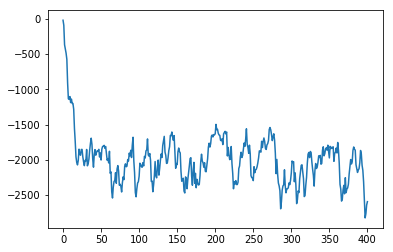

-2592.4985339777177 -2162.0 8.70279501868 0.49800398471185886
-2349.248680579946 -160.0 9.41684704903 0.01
Updating target
Updating target
Updating target
-2381.9238125219513 -2676.0 9.0529731479 0.4979940246819651
Updating target
Updating target
Updating target
Updating target
-2559.1314312697564 -4154.0 8.64912348799 0.4979890447417183
Updating target
-2444.8182881427806 -1416.0 11.7902570041 0.4979840648512709
Updating target
-2293.0364593285026 -927.0 15.1427905746 0.4979790850106224
Updating target
-2168.5328133956527 -1048.0 18.868421891 0.4979741052197723
Updating target
Updating target
Updating target
-2199.1795320560873 -2475.0 15.3260718431 0.49796912547872013
Updating target
Updating target
-2154.8615788504785 -1756.0 10.9661258937 0.49796414578746534
Updating target
Updating target
Updating target
-2276.275420965431 -3369.0 13.4806834739 0.4979591661460075
Updating target
Updating target
Updating target
-2372.8478788688876 -3242.0 8.7127121329 0.49795418655434603
-2150.5630

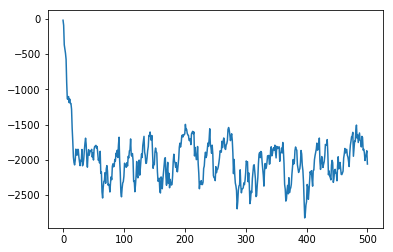

-2059.856963944021 -3751.0 15.6368504444 0.4975062271586141
Updating target
-1878.571267549619 -247.0 20.3970368016 0.01
-1745.314140794657 -546.0 22.2770528009 0.4974962770838216
Updating target
Updating target
-1732.8827267151912 -1621.0 15.8788377046 0.4974913021210508
Updating target
-1699.194454043672 -1396.0 11.4929036654 0.4974863272080296
Updating target
-1625.4750086393049 -962.0 14.0724126355 0.49748135234475754
Updating target
-1543.9275077753744 -810.0 13.1290681913 0.49747637753123414
Updating target
-1476.4347569978368 -869.0 16.3813353661 0.4974714027674588
Updating target
Updating target
-1518.691281298053 -1899.0 15.1413865213 0.49746642805343116
Updating target
-1527.3221531682477 -1605.0 18.0054982485 0.49746145338915065
Updating target
-1476.4899378514228 -1019.0 20.7112277827 0.4974564787746168
Updating target
-1358.1409440662806 -293.0 24.8355794224 0.01
Updating target
Updating target
-1456.3268496596525 -2340.0 24.0863073091 0.49744652969478703
Updating target
U

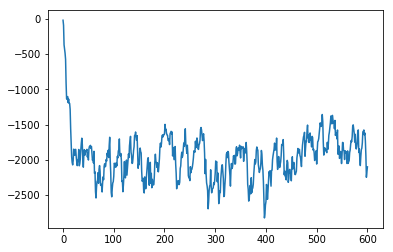

-2099.7187047295265 -1447.0 8.91125480369 0.497008967116613
-1913.646834256574 -239.0 10.7209915468 0.01
Updating target
-1837.7821508309166 -1155.0 10.6343394117 0.4969990269869716
Updating target
Updating target
-1790.003935747825 -1360.0 9.26570727984 0.4969940569967018
Updating target
Updating target
Updating target
-1911.4035421730423 -3004.0 10.523315292 0.4969890870561319
Updating target
Updating target
Updating target
-2058.863187955738 -3386.0 12.2403632628 0.4969841171652613
Updating target
Updating target
-2009.576869160164 -1566.0 9.74711001838 0.49697914732408965
Updating target
-1954.9191822441476 -1463.0 11.9427387093 0.4969741775326164
Updating target
-1850.7272640197327 -913.0 14.2460742322 0.4969692077908411
Updating target
-1775.9545376177593 -1103.0 10.3175039392 0.4969642380987632
Updating target
Updating target
Updating target
-1898.5590838559833 -3002.0 11.9559741266 0.4969592684563823
-1723.9031754703851 -152.0 10.4871888178 0.01
Updating target
Updating target


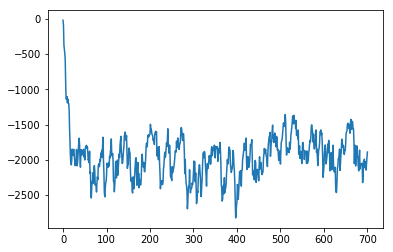

-1889.5945590941908 -1231.0 13.5495721423 0.4965122040885906
Updating target
-1775.9351031847716 -753.0 14.3523175558 0.01
Updating target
-1704.2415928662945 -1059.0 13.4724812364 0.49650227389416013
Updating target
Updating target
Updating target
-1892.517433579665 -3587.0 13.7088140975 0.4964973088714212
Updating target
Updating target
-1862.4656902216987 -1592.0 15.4404323359 0.49649234389833247
Updating target
-1774.419121199529 -982.0 15.6203053683 0.4964873789748935
Updating target
Updating target
-1816.377209079576 -2194.0 13.4843139953 0.4964824141011038
Updating target
Updating target
Updating target
Updating target
-1981.1394881716183 -3464.0 13.811807314 0.4964774492769628
Updating target
Updating target
-1983.3255393544564 -2003.0 11.7282541437 0.49647248450247006
Updating target
Updating target
-1997.5929854190108 -2126.0 11.3361536556 0.49646751977762504
Updating target
Updating target
-2044.0336868771096 -2462.0 10.3301998828 0.4964625551024273
-1857.1303181893986 -175.

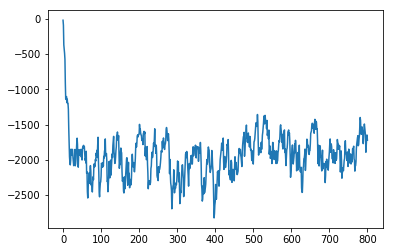

-1721.4496195008853 -2376.0 7.7994702136 0.4960159375777788
-1587.1046575507967 -378.0 10.8334054429 0.01
Updating target
-1545.7941917957169 -1174.0 9.01878137013 0.49600601730862887
Updating target
Updating target
-1576.9147726161452 -1857.0 10.1653701581 0.4960010572484558
Updating target
-1477.5232953545308 -583.0 9.57251511771 0.4959960972378833
Updating target
-1463.5709658190776 -1338.0 9.0203948063 0.4959911372769109
Updating target
-1424.21386923717 -1070.0 10.6761102582 0.4959861773655382
Updating target
Updating target
-1475.892482313453 -1941.0 13.177002032 0.49598121750376456
Updating target
Updating target
-1549.9032340821077 -2216.0 12.5725463688 0.49597625769158954
Updating target
Updating target
Updating target
Updating target
Updating target
-1826.5129106738968 -4316.0 12.2142006054 0.4959712979290126
Updating target
-1794.6616196065072 -1508.0 10.7812812788 0.49596633821603336
-1640.9954576458565 -258.0 10.3626638417 0.01
Updating target
-1589.4959118812708 -1126.0 9

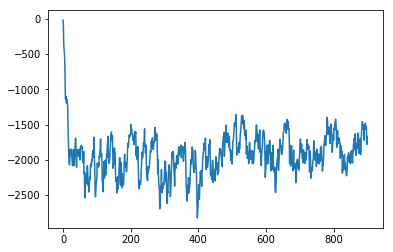

-1670.7924634652036 -1223.0 12.5526819809 0.49552016708790597
-1520.4132171186834 -167.0 10.5229880678 0.01
Updating target
Updating target
Updating target
-1663.171895406815 -2948.0 11.2715778519 0.49551025673411625
Updating target
Updating target
-1619.0547058661336 -1222.0 9.71855660833 0.49550530163154893
Updating target
Updating target
Updating target
-1828.3492352795201 -3712.0 8.54922558097 0.49550034657853265
Updating target
Updating target
Updating target
-1898.214311751568 -2527.0 6.56038159504 0.4954953915750669
Updating target
Updating target
-1955.3928805764112 -2470.0 7.20718257122 0.49549043662115116
Updating target
Updating target
-1916.7535925187703 -1569.0 6.85341263633 0.49548548171678497
Updating target
-1847.5782332668934 -1225.0 8.82179720959 0.4954805268619678
Updating target
Updating target
-1848.920409940204 -1861.0 9.97940198203 0.49547557205669923
Updating target
Updating target
-1828.0283689461837 -1640.0 11.8736243641 0.4954706173009787
-1667.4255320515654 

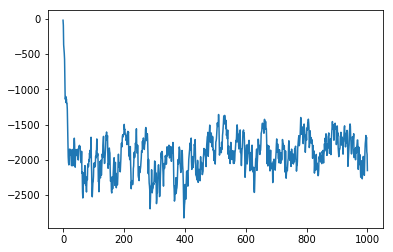

-2151.9457996413175 -4206.0 10.678068126 0.4950248921231969
-1967.3512196771858 -306.0 9.60594507692 0.01
Updating target
Updating target
-1945.5160977094672 -1749.0 9.69420727528 0.49501499167485696
Updating target
-1884.1644879385206 -1332.0 9.0262693756 0.4950100415249402
Updating target
Updating target
Updating target
-2005.2480391446686 -3095.0 9.01805015633 0.495005091424525
Updating target
Updating target
-1992.9232352302017 -1882.0 7.75471276342 0.49500014137361076
Updating target
Updating target
Updating target
Updating target
Updating target
-2230.230911707182 -4366.0 7.92773862612 0.49499519137219705
Updating target
Updating target
-2268.3078205364636 -2611.0 7.95006066697 0.49499024142028336
Updating target
-2153.7770384828173 -1123.0 9.66166033078 0.4949852915178692
Updating target
-2042.0993346345356 -1037.0 9.87858796164 0.494980341664954
Updating target
Updating target
Updating target
Updating target
Updating target
-2286.8894011710818 -4490.0 9.91235632075 0.4949753918

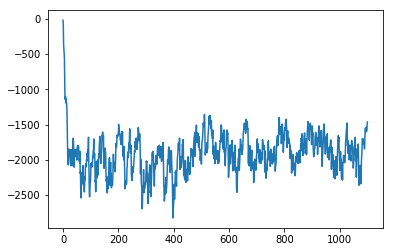

-1463.5502875048726 -1015.0 10.4723218596 0.4945301121883713
-1339.4952587543853 -223.0 10.75486538 0.01
Updating target
Updating target
-1381.3457328789468 -1758.0 13.8454238485 0.49452022163558057
Updating target
-1332.511159591052 -893.0 14.8083718282 0.49451527643336424
Updating target
Updating target
Updating target
Updating target
Updating target
-1699.2600436319467 -5000.0 14.0807865887 0.4945103312805999
Updating target
Updating target
-1722.234039268752 -1929.0 18.5371076645 0.4945053861772871
Updating target
Updating target
-1753.8106353418768 -2038.0 13.3577544942 0.4945004411234254
Updating target
Updating target
-1724.529571807689 -1461.0 12.8583286407 0.49449549611901417
Updating target
Updating target
Updating target
-1879.97661462692 -3279.0 12.844377768 0.494490551164053
Updating target
Updating target
Updating target
Updating target
-2149.778953164228 -4578.0 13.0383474708 0.4944856062585414
Updating target
Updating target
-2087.901057847805 -1531.0 15.4977044559 0.49

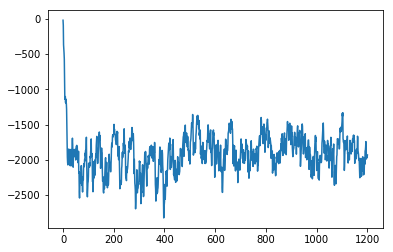

-1931.41955935817 -1632.0 13.304977895 0.49403582678864433
-1769.1776034223533 -309.0 14.8344329141 0.01
Updating target
Updating target
Updating target
-1824.8598430801178 -2326.0 16.6403375761 0.4940259461215122
Updating target
Updating target
Updating target
Updating target
-2064.173858772106 -4218.0 18.5031774622 0.494021005862051
Updating target
-2005.7564728948955 -1480.0 18.0971015039 0.4940160656519924
Updating target
Updating target
Updating target
-2103.4808256054057 -2983.0 16.0799469624 0.4940111254913359
Updating target
Updating target
-2080.132743044865 -1870.0 14.3815609676 0.494006185380081
Updating target
-1970.8194687403786 -987.0 12.1844001965 0.49400124531822726
Updating target
Updating target
-1993.9375218663408 -2202.0 12.7293270266 0.4939963053057741
Updating target
Updating target
-1953.9437696797067 -1594.0 13.8368648076 0.4939913653427211
Updating target
Updating target
Updating target
Updating target
-2122.849392711736 -3643.0 14.8889032281 0.4939864254290677

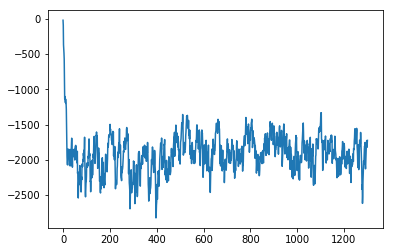

-1724.467389168823 -1161.0 15.0831313559 0.4935420354297259
-1576.220650251941 -242.0 14.7440044302 0.01
Updating target
-1546.2985852267468 -1277.0 14.3279240803 0.4935321646383716
Updating target
-1461.2687267040722 -696.0 14.8759892106 0.4935272293167252
Updating target
-1462.7418540336648 -1476.0 16.6238605134 0.49352229404443204
Updating target
-1389.0676686302984 -726.0 22.1818917361 0.4935173588214916
Updating target
Updating target
-1446.4609017672685 -1963.0 20.7836720035 0.49351242364790343
Updating target
Updating target
-1457.8148115905417 -1560.0 20.406011219 0.493507488523667
Updating target
-1482.7333304314875 -1707.0 19.0523187077 0.4935025534487818
Updating target
Updating target
Updating target
Updating target
Updating target
-1749.0599973883386 -4146.0 19.2459475746 0.49349761842324735
Updating target
-1694.0539976495047 -1199.0 13.5653024401 0.49349268344706315
-1547.6485978845542 -230.0 16.135683087 0.01
Updating target
Updating target
Updating target
-1689.7837380

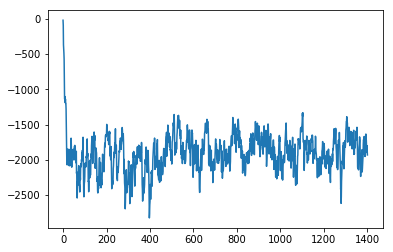

-1930.9694932164284 -2587.0 15.0521918614 0.49304873761781953
-1776.1725438947856 -383.0 13.2796801505 0.01
Updating target
-1698.1552895053069 -996.0 15.5911782252 0.4930388766923721
Updating target
Updating target
-1717.139760554776 -1888.0 16.1285588742 0.4930339463036052
Updating target
Updating target
-1707.1257844992986 -1617.0 16.5332048096 0.49302901596414217
Updating target
Updating target
Updating target
-1875.5132060493686 -3391.0 12.7200133013 0.49302408567398254
Updating target
Updating target
-1921.4618854444318 -2335.0 11.2606636619 0.4930191554331258
Updating target
Updating target
-1889.5156968999886 -1602.0 12.5610734395 0.4930142252415715
Updating target
-1841.9641272099898 -1414.0 13.0423811323 0.4930092950993191
Updating target
Updating target
Updating target
-1930.4677144889906 -2727.0 11.112563697 0.49300436500636813
Updating target
-1860.7209430400915 -1233.0 14.139082566 0.4929994349627181
Updating target
-1699.3488487360823 -247.0 15.9478871356 0.01
Updating t

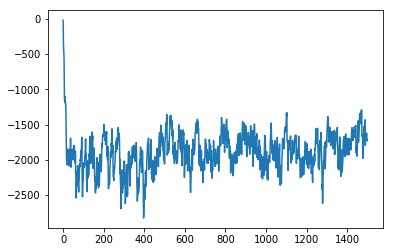

-1718.456102842235 -1596.0 16.9412843278 0.4925559328596224
-1567.2104925580113 -206.0 12.6295692641 0.01
Updating target
-1513.88944330221 -1034.0 16.3941869659 0.49254608179022086
Updating target
Updating target
-1565.7004989719892 -2032.0 13.7098950026 0.492541156329403
Updating target
Updating target
-1585.4304490747902 -1763.0 12.4748263971 0.4925362309178397
Updating target
-1568.2874041673113 -1414.0 12.1801144521 0.49253130555553054
Updating target
-1505.6586637505802 -942.0 12.993647393 0.492526380242475
Updating target
-1453.3927973755222 -983.0 15.1292974253 0.4925214549786726
Updating target
-1407.95351763797 -999.0 12.1523659144 0.49251652976412286
Updating target
Updating target
Updating target
Updating target
-1681.5581658741728 -4144.0 11.5064667735 0.49251160459882526
Updating target
Updating target
-1667.4023492867555 -1540.0 14.0994585351 0.4925066794827793
-1526.06211435808 -254.0 14.4581785557 0.01
Updating target
-1454.455902922272 -810.0 12.5474982889 0.492496829

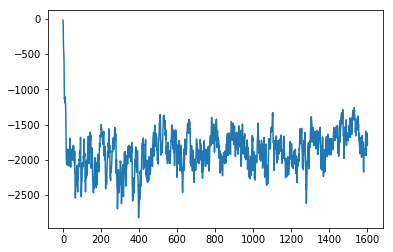

-1791.612854218274 -3318.0 12.7150860589 0.49206362066232445
Updating target
-1632.0515687964464 -196.0 13.2439365049 0.01
Updating target
Updating target
-1676.9464119168017 -2081.0 9.8106927164 0.4920537794391176
Updating target
-1616.2517707251216 -1070.0 7.01945953876 0.4920488589013232
Updating target
Updating target
Updating target
-1753.2265936526094 -2986.0 8.45407208791 0.49204393841273425
Updating target
Updating target
-1816.5039342873483 -2386.0 8.06165650881 0.49203901797335015
Updating target
Updating target
-1781.8535408586135 -1470.0 9.25267602359 0.49203409758317046
-1689.2681867727522 -856.0 10.3078688781 0.49202917724219464
Updating target
Updating target
-1656.241368095477 -1359.0 9.69230912669 0.49202425695042223
Updating target
-1615.3172312859292 -1247.0 11.1110641765 0.49201933670785275
Updating target
Updating target
-1650.7855081573364 -1970.0 11.0233337269 0.4920144165144857
-1503.3069573416026 -176.0 13.9409411848 0.01
Updating target
Updating target
-1486.5

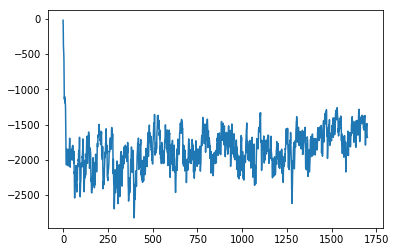

-1682.3281822323816 -1736.0 14.0900809098 0.49157180053360927
-1528.2953640091434 -142.0 18.8951904644 0.01
Updating target
Updating target
Updating target
-1680.265827608229 -3048.0 14.0847371946 0.4915619691467558
Updating target
-1599.4392448474061 -872.0 12.7372516767 0.49155705352706436
Updating target
Updating target
-1628.4953203626656 -1890.0 13.4774245084 0.49155213795652913
Updating target
Updating target
-1606.145788326399 -1405.0 10.4968110071 0.4915472224351496
Updating target
Updating target
Updating target
-1788.5312094937592 -3430.0 11.1584988338 0.4915423069629253
Updating target
-1721.5780885443833 -1119.0 10.1772875842 0.49153739153985565
Updating target
Updating target
Updating target
Updating target
Updating target
-2049.420279689945 -5000.0 8.82230455362 0.49153247616594026
Updating target
-1919.2782517209505 -748.0 9.7125949492 0.4915275608411786
Updating target
-1850.2504265488556 -1229.0 9.54587176838 0.49152264556557024
-1696.6253838939701 -314.0 9.31297401486

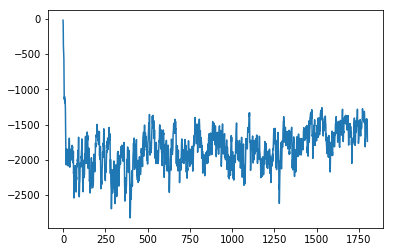

-1737.5306211105592 -3851.0 13.1817501393 0.4910804719816513
Updating target
-1581.6775589995034 -179.0 18.0822181931 0.01
Updating target
Updating target
Updating target
Updating target
Updating target
-1923.5098030995528 -5000.0 11.7206235604 0.4910706504213197
Updating target
Updating target
-2021.2588227895974 -2901.0 9.63988022873 0.4910657397148155
Updating target
Updating target
Updating target
-2110.6329405106376 -2915.0 11.6791920239 0.4910608290574184
Updating target
Updating target
Updating target
Updating target
-2283.469646459574 -3839.0 12.3195394392 0.4910559184491278
Updating target
Updating target
Updating target
-2300.2226818136164 -2451.0 11.4229587172 0.4910510078899434
Updating target
-2190.100413632255 -1199.0 11.878074121 0.4910460973798645
Updating target
Updating target
Updating target
-2314.6903722690295 -3436.0 9.28198238173 0.4910411869188907
Updating target
Updating target
-2239.0213350421263 -1558.0 9.78701200806 0.49103627650702153
Updating target
Updatin

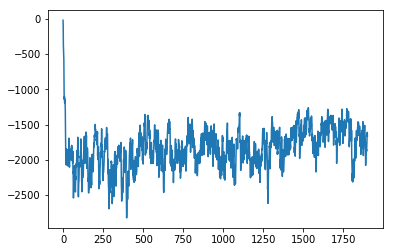

-1664.5766272914232 -2146.0 13.1941415833 0.4905896345151167
-1514.0189645622809 -159.0 10.2550673125 0.01
Updating target
Updating target
-1493.0170681060526 -1304.0 13.6999115082 0.49057982277148543
Updating target
-1481.3153612954472 -1376.0 13.0862269867 0.4905749169732577
Updating target
Updating target
-1478.4838251659025 -1453.0 12.1930701516 0.490570011224088
-1418.5354426493122 -879.0 13.3356122671 0.49056510552397575
Updating target
Updating target
-1438.981898384381 -1623.0 11.579756928 0.49056019987292054
Updating target
-1388.1837085459429 -931.0 14.8927994748 0.4905552942709218
Updating target
-1374.3653376913487 -1250.0 15.1744461519 0.4905503887179791
Updating target
Updating target
-1456.1288039222138 -2192.0 15.9675304934 0.49054548321409197
Updating target
Updating target
-1447.3159235299925 -1368.0 12.9453155838 0.49054057775925985
-1339.884331176993 -373.0 14.9149169002 0.01
Updating target
Updating target
-1362.295898059294 -1564.0 16.6309841971 0.4905307669967587

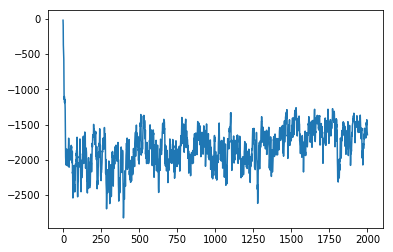

-1644.6351728236632 -1908.0 7.66093994225 0.4900992876431635
-1498.271655541297 -181.0 7.61425174176 0.01
Updating target
Updating target
-1501.3444899871674 -1529.0 7.67810569688 0.49008948570642064
Updating target
Updating target
-1546.6100409884507 -1954.0 9.13538037037 0.4900845848115636
Updating target
Updating target
-1630.9490368896056 -2390.0 7.03429415613 0.4900796839657155
Updating target
Updating target
-1618.854133200645 -1510.0 7.26864283761 0.49007478316887587
Updating target
Updating target
-1678.1687198805805 -2212.0 10.7537184513 0.4900698824210442
Updating target
Updating target
Updating target
Updating target
-1910.5518478925223 -4002.0 8.00183204687 0.49006498172222
Updating target
Updating target
-1877.09666310327 -1576.0 9.89582015338 0.49006008107240284
-1777.2869967929428 -879.0 9.90632093526 0.49005518047159213
Updating target
-1691.6582971136484 -921.0 11.3440445049 0.49005027991978745
Updating target
-1539.9924674022836 -175.0 12.3633471967 0.01
Updating targ

KeyboardInterrupt: 

In [15]:
decay = 0.99999
eps = 0.01
eps1 = 0.5
t_avg = 10
alpha = 0.9
nt = []

for i_episode in range(num_episodes):
    
    observation = env.reset()
    r = 0
    
    e = 0
    t = 0
    while t < num_steps:
        env.render()
        
        action = policy(observation)

        o, reward, done, info = env.step(action)
        
        replay.experience(observation, action, reward, o)
        
        observation = o
        d = replay.sample_minibatch(batch_size)
        e += dqn.play(d)
        
        r += reward
        t += 1
        
        if done and t < num_steps-1:
            replay.experience(observation, action, reward, np.zeros(observation.shape))
            break

    t_avg = alpha*t_avg + (1-alpha)*r
    
    eps1 *= decay
    
    nt.append((t_avg, r, e/t, eps))
    
    if i_episode%100 == 0:
        plt.clf()
        plt.plot([_[0] for _ in nt])
        plt.show()
        
    print(t_avg, r, e/t, eps)
    
    if i_episode%10 == 0:
        eps = 0.01
    else:
        eps = eps1

env.close()

In [5]:
import pickle
import os.path

def read_replay():

    file_path = "replay1.pkl"
    max_bytes = 2**31 - 1

    ## read
    bytes_in = bytearray(0)
    input_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f_in:
        for _ in range(0, input_size, max_bytes):
            bytes_in += f_in.read(max_bytes)
    replay = pickle.loads(bytes_in)
    
    return replay

def write_replay():
    file_path = "replay1.pkl"
    max_bytes = 2**31 - 1

    ## write
    bytes_out = pickle.dumps(replay)
    with open(file_path, 'wb') as f_out:
        for idx in range(0, len(bytes_out), max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])


In [11]:
# testing for cartpole
import gym
from gym import wrappers
import matplotlib.pyplot as plt
import pickle

input_dim = (80, 80, 1)
layers =  ['conv',(3,3,1,16),'conv',(3,3,16,16),'flatten','fc', (None, 512),'fc', (None, 128)]
action_count = 2
update_region = 5000
discount = 0.99
lr = 1e-4
reg = 1e-9

config = generate_config(input_dim, action_count, layers, update_region, discount, lr, reg)
num_episodes = 500000
num_steps = 1000
batch_size = 32
buffer_size = 4000

dqn = DQN(config)

#load replay
print("Reading Replay...")
#replay = read_replay()
print("Reading Replay Done.")


Reading Replay...
Reading Replay Done.


In [37]:
def policy(s):
    p = np.random.rand()
    a = dqn.max_q(s)[0]
    if p < eps:
        q = np.random.rand()
        if q < 0.5:
            return 0
        else:
            return 1
    else:
        return a

eps = 0.05 #1.0
eps1 = 1.0

decay = 0.9999
start_learning = 1000
replay.buffer_size = 1000000
dqn.update = 10000
learning_freq = 1000000
env = gym.make('Pong-v0')
t_avg = -21
alpha = 0.99
batch_size = 32
nt = []

for i_episode in range(num_episodes):
    
    observation_0 = None
    observation_1 = None
    observation_2 = None
    observation = None
    
    observation_0 = preprocess_observations(env.reset())
    r = 0
    
    e = 0
    t = 0
    while True:
        env.render()
        
        if observation is not None:
            action = policy(observation)
        else:
            action = 0
        
        o, reward, done, info = env.step(action+2)
        
        if observation_1 is None:
            observation_1 = preprocess_observations(o)
        
        else:
            observation_2 = preprocess_observations(o)
            
            observation = observation_1-observation_0
            observation_n = observation_2-observation_1
            
            observation_0 = observation_1
            observation_1 = observation_2
        
        if observation is not None:
            replay.experience(observation, action, reward, observation_n)
            
        #if t%learning_freq == 0 and eps > 0.05:
            
            #if replay.count > start_learning:
            #    d = replay.sample_minibatch(batch_size)
                #e += np.sqrt(dqn.play(d))
        
        r += reward
        t += 1

        if done:
            replay.experience(observation, action, reward, np.zeros(observation.shape))
            break

    t_avg = alpha*t_avg + (1-alpha)*r
    
    eps1 *= decay
    
    if i_episode%10 == 0 and i_episode > 0:
        eps = 0.05
    else:
        eps = eps1
    
    eps = 0.05
    nt.append((t_avg, r, learning_freq*e/t, eps))
    
    if i_episode%50 == 0 and i_episode > 0:
        write_replay()
        plt.clf()
        #plt.plot([_[0] for _ in nt])
        plt.plot([_[2] for _ in nt])
        plt.show()
        
    print(t_avg, r, learning_freq*e/t, eps, i_episode, replay.count)

env.close()

[2017-05-13 12:22:42,901] Making new env: Pong-v0


-21.0 -21.0 0.0 0.05 0 722457


KeyboardInterrupt: 

80.8070805989 248.246
72.8451015582 1.18729
69.5782000449 40.1761
71.866554662 92.4617
71.0318778793 63.5198
76.973578397 130.449
79.0600187751 97.838
75.8151581024 46.6114
75.4076848032 71.7404
76.5677052022 87.0079
82.1995500995 132.886
79.4676459318 54.8805
78.5623448091 70.4146
85.7667548594 150.606
92.9980139438 158.079
91.30003216 76.0182
85.9235045147 37.5348
92.8305833845 154.994
92.8029175021 92.5539
93.1519203381 96.2929
96.0664150413 122.297
97.0873827901 106.276
92.1268367261 47.4819
85.9673415682 30.5319
89.5909778948 122.204
92.6516654141 120.198
102.119013826 187.325
104.402084673 124.95
97.5625643768 36.0069
90.5248130356 27.1851
84.8064847166 33.3415
79.3548296608 30.2899
73.1918888853 17.7254
68.4313582151 25.5866
83.6701041075 220.819
76.9147802125 16.1169
88.5667241273 193.434
82.5837789409 28.7373
80.81720784 64.9181
77.6747921707 49.3931
70.2014331939 2.9412
67.2902982821 41.0901
62.0878004363 15.2653
59.2933461068 34.1433
55.5760110078 22.12
71.8482271067 218.298

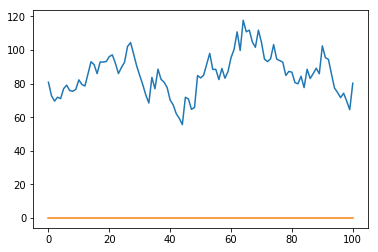

74.7541762225 25.5398
72.496446207 52.1769
69.3940950586 41.4729
78.3374675352 158.828
84.6609778617 141.573
79.7399697973 35.4509
79.8628897792 80.9692
86.438398897 145.618
79.9712931687 21.7673
75.3530495024 33.7889
73.506589233 56.8884
90.6938361935 245.379
91.6703647445 100.459
91.2389056627 87.3558
84.8214960763 27.0648
82.4522653224 61.1292
81.0711363854 68.641
87.0168639334 140.528
84.0819465678 57.6677
87.070614704 113.969
85.9121860461 75.4863
78.4936485824 11.7268
74.2638638022 36.1958
78.5560778859 117.186
73.864104779 31.6363
70.5773856921 40.9969
63.7262357011 2.06589
67.3924144686 100.388
75.1000541253 144.469
69.8339749518 22.4393
75.4150321075 125.645
71.164365231 32.9084
68.9108956268 48.6297
64.5422181735 25.2241
67.42718703 93.3919
69.628998814 89.4453
88.0310067696 253.649
83.8800831403 46.5218
76.5410275965 10.4895
79.3137482622 104.268
75.4364723282 40.541
71.2657334968 33.7291
70.4675842194 63.2842
75.0046636881 115.838
82.8970836718 153.929
78.9291553187 43.2178

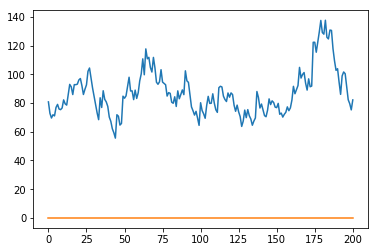

91.7812466249 178.207
107.371011367 247.679
101.247923902 46.1401
106.779065655 156.559
103.277195161 71.7604
100.707321714 77.5785
98.4135090986 77.7692
115.506038804 269.339
108.582816439 46.2738
124.460850713 267.363
125.634101579 136.193
116.315436294 32.4474
107.800677905 31.1679
115.151707527 181.311
115.054796967 114.183
103.735466546 1.86149
115.465133392 221.032
105.929531804 20.1091
102.934063212 75.9748
98.2776789091 56.3702
94.8564639051 64.0655
90.595553919 52.2474
83.0185604969 14.8256
81.0261755776 63.0947
81.8949325315 89.7137
78.0378294914 43.3239
80.0098728057 97.7583
93.0579410061 210.491
87.695600122 39.4345
87.4720117895 85.4597
84.2696142299 55.448
85.4381194207 95.9547
94.0038396442 171.095
112.030369132 274.269
105.284553059 44.5722
108.250146826 134.94
107.19457947 97.6945
107.629408479 111.543
123.346518291 264.801
114.020793425 30.0893
116.658371676 140.397
108.765721001 37.7319
112.058002661 141.689
104.698436907 38.4623
110.656585465 164.28
102.119799217 25

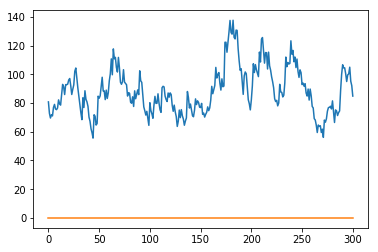

88.2057713345 118.397
82.8529588648 34.6776
84.9155832053 103.479
92.5141005684 160.901
83.9406900557 6.78
92.9816796439 174.351
93.1072116307 94.237
92.4524291883 86.5594
103.076000356 198.688
108.195411429 154.27
103.199553834 58.2368
93.1490297796 2.69431
86.851765771 30.1764
96.9536131197 187.87
88.3727572894 11.1451
82.7758124473 32.4033
91.973516542 174.753
85.9688111051 31.9265
79.3036940251 19.3176
77.7920921702 64.1877
98.5105147891 284.976
89.1997713088 5.40308
84.1038000678 38.2401
86.4528263416 107.594
104.010955573 262.034
105.122269989 115.124
96.2631111507 16.5307
89.0416057912 24.0481
85.4679730899 53.3053
84.523077026 76.019
81.7225042478 56.5173
74.6036479499 10.5339
76.4589936041 93.1571
90.6402640435 218.272
89.3573442065 77.8111
83.1040551213 26.8245
80.1936049772 53.9996
75.2538501542 30.7961
74.1413481344 64.1288
73.7312843659 70.0407
78.9525429837 125.944
74.4223914533 33.651
72.0780038705 50.9785
69.4477520827 45.7755
71.5047323981 90.0176
74.9542286407 106.0
8

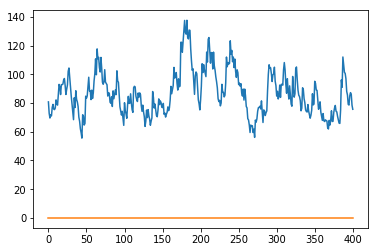

74.3248112787 62.267
100.116249829 332.239
106.88885031 167.842
101.311621849 51.1166
92.5410013893 13.6054
89.2017171531 59.1482
96.0838464631 158.023
94.2719263554 77.9646
91.9979266215 71.5319
94.3316544671 115.335
87.0656711799 21.6718
96.7782797821 184.192
102.719389487 156.189
99.968333717 75.2088
94.0621047459 40.906
90.1134454646 54.5755
97.633982632 165.319
89.9855774642 21.1499
86.2968162418 53.098
93.6484715927 159.813
84.6238818158 3.40257
86.0119277468 98.5043
80.5981874792 31.8745
87.4248799617 148.865
104.788452757 261.061
103.751885771 94.4228
107.746619069 143.699
108.262890389 112.909
103.836236284 63.9963
101.810329025 83.5772
92.7889634238 11.5967
92.7938576698 92.8379
88.885298624 53.7083
96.3471944818 163.504
102.001067563 152.886
100.828490714 90.2753
102.323634654 115.78
92.2672068146 1.75936
87.1783710361 41.3788
81.9593498504 34.9882
109.726690012 359.633
104.53585733 57.8184
95.076786062 9.94514
86.3447137066 7.75606
81.12105891 34.1082
75.0538701256 20.4492


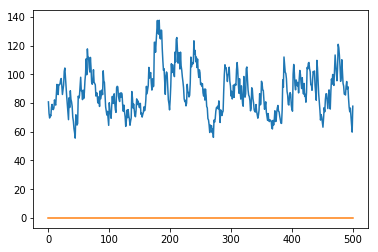

75.220035539 51.9429
77.3288974636 96.3087
77.4015596277 78.0555
71.7221298307 20.6073
77.1982688984 126.484
79.8367755962 103.583
88.0587285297 162.056
91.0014480535 117.486
89.3878373668 74.8653
94.2584499924 138.094
96.1575775273 113.25
96.860766613 103.189
92.7831227215 56.0843
85.4809100358 19.761
86.8796528335 99.4683
83.0601396223 48.6845
81.2640209848 65.099
81.0572188008 79.196
86.1901123382 132.386
112.707322418 351.362
109.458127957 80.2154
107.716557867 92.0424
101.52633099 45.8143
100.438945236 90.6525
100.485128685 100.901
97.0390801108 66.0246
93.1150785633 57.7991
88.2769746376 44.734
80.6115208262 11.6224
73.0904234464 5.40055
75.0828581525 93.0148
92.5000239974 249.255
102.355980155 191.06
106.644158384 145.238
104.214286919 82.3454
95.6805872993 18.8773
97.0313220569 109.188
92.5434352888 52.1525
88.183974725 48.9488
82.1991961795 28.3362
80.5723597525 65.9308
98.6266655253 261.115
106.255278575 174.913
97.2718634493 16.4211
89.3721145052 18.2744
80.9235207609 4.8861

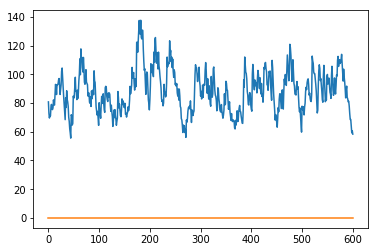

59.3479273955 68.2802
55.5136677599 21.0053
58.7893120923 88.2701
54.7962464761 18.8587
59.5095104698 101.929
76.3629722646 228.044
72.791136937 40.6446
67.317337498 18.0531
68.3023418769 77.1674
67.2087463306 57.3664
77.8009484797 173.131
98.4246133974 284.038
95.530673481 69.4852
87.6017146381 16.2411
86.5726886516 77.3115
91.128366869 132.129
89.3105443727 72.9501
89.0703812013 86.9089
120.322452578 401.591
116.731965286 84.4176
113.517790516 84.5902
119.497472036 173.315
115.26267692 77.1495
104.204999916 4.68591
98.695501893 49.11
94.9365798318 61.1063
87.5432558254 21.0033
86.3475407775 75.5861
104.344192339 266.314
101.031516117 71.2174
97.2738238711 63.4546
93.4624117141 59.1597
88.5787006788 44.6253
93.5003258502 137.795
85.2306374653 10.8034
80.3689006993 36.6133
80.3776298311 80.4562
78.411287136 60.7142
71.4425300007 8.72372
84.5279522936 202.297
84.5200369775 84.4488
87.4433491367 113.753
80.3095572833 16.1054
101.801407341 295.228
110.934071783 193.128
119.225051812 193.8

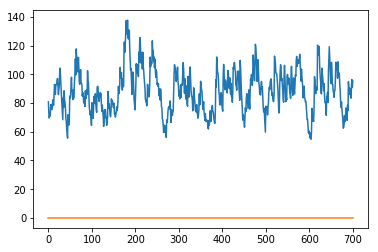

86.539821928 7.44251
90.991891371 131.061
95.3077016235 134.15
94.490088352 87.1316
94.484587665 94.4351
97.5691855391 125.331
98.1693882621 103.571
107.487645359 191.352
98.5476037004 18.0872
98.222988594 95.3015
91.1540390388 27.5335
88.6599615814 66.2133
81.3858729245 15.9191
79.9585183896 67.1123
79.8969179545 79.3425
79.9758212823 80.686
84.5919285767 126.137
101.42330121 252.906
95.7357077984 44.5474
88.3988714088 22.3673
88.306815994 87.4783
106.949544429 274.734
102.972535848 67.1795
97.6553691617 49.8009
104.464844453 165.75
110.725800193 167.074
111.712909505 120.597
117.664442651 171.228
109.179215961 32.8122
98.9095600127 6.48266
105.968944282 169.503
101.123447178 57.514
94.0353019458 30.242
86.9655810316 23.3381
79.9830535757 17.1403
84.9221841312 129.374
82.0061166123 55.7615
79.6595607372 58.5406
89.779699329 180.861
81.5916311772 7.89902
79.8747104911 64.4224
80.4688358165 85.816
85.0106645456 125.887
104.484103706 279.745
101.156516242 71.2082
92.6586777283 16.1781
10

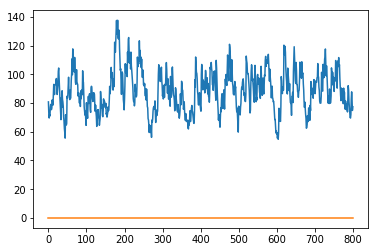

73.8174445661 41.2167
67.0608052998 6.25105
74.4378287127 140.831
73.5344785806 65.4043
81.1263874731 149.454
85.0746595229 120.609
89.7489745765 131.818
80.9381135597 1.64036
76.7540346408 39.0973
79.6104175232 105.318
91.815061806 201.657
83.6968626246 10.6331
75.9532249271 6.26049
71.4220620184 30.6416
65.672532933 13.9268
62.1630093607 30.5773
81.6812329608 257.345
84.0180039213 105.049
89.2659044569 136.497
86.5640797888 62.2477
85.7595112569 78.5184
95.4821349604 182.986
89.6425476392 37.0863
94.0366562176 133.584
96.9591197462 123.261
93.5394071124 62.762
95.7687763377 115.833
95.1710849527 89.7919
88.0139152697 23.5994
99.2640633546 200.515
90.2596885171 9.22031
96.1208946531 148.872
86.792902907 2.84098
87.8209406498 97.0733
94.4990516629 154.602
88.0586479538 30.095
95.6701491863 164.174
88.5411271265 24.3799
82.8770658742 31.9005
79.6054492983 50.1609
89.6058052474 179.609
86.6493770206 60.0415
90.655049365 126.706
84.4053698908 28.1583
82.187863755 62.2303
95.7288292716 217

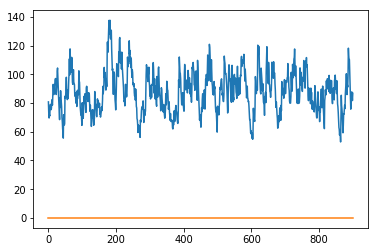

78.2764981095 1.55212
91.1622256789 207.134
83.0830757695 10.3707
75.4631833385 6.88415
71.8528723136 39.3601
90.6781380607 260.106
83.587654081 19.7733
80.0364490214 48.0756
79.7705635187 77.3776
75.2693601331 34.7585
73.8359711779 60.9355
75.7192922425 92.6692
72.7507321589 46.0337
75.094598152 96.1894
76.3816356817 87.965
72.1352209234 33.9175
78.1832985625 132.616
71.3704160939 10.0545
67.6541451297 34.2077
74.1871131851 132.984
74.9043653065 81.3596
80.9052312661 134.913
73.4877447625 6.73037
68.7554268902 26.1646
67.1606947481 52.8081
71.7719819933 113.274
75.0468071094 104.52
75.5292418769 79.8712
73.5109593366 55.3464
70.4093293453 42.4947
68.0629360531 46.9454
61.5428191293 2.86177
58.8325325014 34.44
57.9247702028 49.7549
64.9162127077 127.839
60.7035983949 22.7901
58.3829211726 37.4968
53.7874581874 12.4283
50.4642986114 20.5559
51.73075022 63.1288
59.0507461818 124.931
68.624548822 154.789
73.5756086492 118.135
71.4529247985 52.3488
67.5566328679 32.49
76.3984579845 155.975

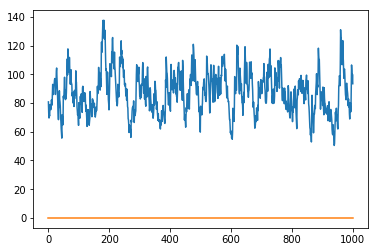

85.2625551044 11.4056
77.1621842222 4.25885
71.4054005 19.5943
75.4585524666 111.937
92.777402115 248.647
92.2839072038 87.8425
86.9696793099 39.1416
95.5726198262 172.999
92.775156275 67.598
94.633912315 111.363
106.817609707 216.471
117.136062359 210.002
109.122386696 36.9993
107.610031296 93.9988
111.078305205 142.293
123.046130813 230.757
120.814759919 100.732
112.523625113 37.9034
105.730236677 44.5897
124.009672726 288.525
115.281303339 36.726
111.349656617 75.9648
102.3350437 21.2035
108.709818749 166.083
114.896631064 170.578
103.588771768 1.81804
97.7621093282 45.3221
90.9828792533 29.9698
83.4356057513 15.5101
80.5667914988 54.7475
72.9132827915 4.0317
81.7759752033 161.54
76.4174778722 28.191
70.7709290977 19.952
69.6218333956 59.28
63.385256879 7.25607
64.7191921286 76.7246
88.8160229157 305.688
100.157806244 202.234
92.8004145206 26.5839
103.207078086 196.867
107.02264347 141.363
112.435698948 161.153
115.752016748 145.599
113.354486124 91.7767
108.857942846 68.3891
109.94

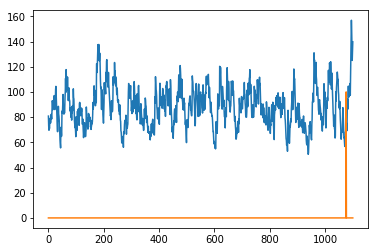

144.213151293 184.25
138.854118726 90.6228
146.698722417 217.3
139.67664528 76.478
131.520043756 58.1106
149.338269483 309.702
135.241245876 8.36803
127.815208599 60.9809
117.312161021 22.7847
120.934182834 153.532
120.024625329 111.839
118.409981705 103.878
116.647129134 100.781
113.527577658 85.4516
108.88655085 67.1173
130.807612562 328.097
124.182681689 64.5583
116.395794364 46.3138
113.280485557 85.2427
110.402173788 84.4974
100.932070354 15.7011
104.919530433 140.807
110.741490353 163.139
102.445250406 27.7791
101.806435204 96.0571
97.3464215667 57.2063
92.8659095828 52.5413
88.5669902859 49.8767
82.1573299078 24.4704
80.0890254296 61.4743
72.6302014217 5.50079
71.8635809683 64.964
76.4505154129 117.733
70.3549698684 15.4951
63.5862397158 2.66767
58.0076523844 7.80037
74.6859826049 224.791
80.8532257141 136.358
81.8332923944 90.6539
74.500316682 8.50354
82.4679211222 154.176
77.0747024276 28.5357
74.4377865367 50.7055
68.6645900821 16.7058
73.1244089975 113.263
76.8331808663 110.

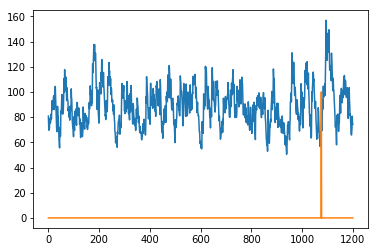

76.697960217 98.7389
105.034554576 360.064
116.948771848 224.177
125.156833506 199.029
124.512266794 118.711
115.369007491 33.0797
111.205879172 73.7377
110.096630061 100.113
101.884378974 27.9741
98.0044165707 63.0848
94.3794265738 61.7545
85.8778369323 9.36353
78.4189580586 11.289
70.6494184112 0.723562
69.6065522232 60.2208
63.4674321113 8.21535
63.2503519861 61.2966
66.2366204985 93.113
73.1843451674 135.714
70.1202529205 42.5434
68.0243679941 49.1614
81.8828183407 206.609
79.6430220718 59.4849
76.2478654487 45.6915
76.3545570227 77.3148
71.2703082907 25.5121
74.9314770771 107.882
75.4817131584 80.4338
72.4992164337 45.6567
77.7962582913 125.47
73.4183113104 34.0168
75.4338394933 93.5736
88.3747038961 204.842
85.6353196728 60.9809
84.8295742656 77.5779
76.7727610098 4.26144
74.2719802702 51.765
86.8380256513 199.932
82.2468633908 40.9264
82.5031188242 84.8094
94.1293969076 198.766
86.2058936525 14.8944
83.546616772 59.6131
79.4988677077 43.0691
76.313956294 47.6498
86.2249221148 17

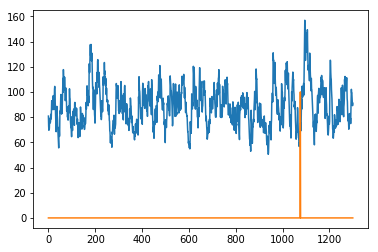

89.8454713941 79.1001
98.8927907098 180.319
96.1435224726 71.4001
109.288333128 227.592
109.865737608 115.062
106.928185759 80.4902
112.505778865 162.704
114.224042532 129.688
122.529961643 197.283
113.664555124 33.8759
102.371959005 0.738594
94.8120038576 26.7724
87.536018163 22.0521
89.6178014786 108.354
84.9141927937 42.5817
89.5029920202 130.802
88.2447872396 76.9209
80.3796797009 9.59371
76.6263266753 42.8461
79.5343071059 105.706
78.8793665381 72.9849
96.0396598648 250.482
89.0035554353 25.6786
88.8119233415 87.0872
93.1113706558 131.806
85.7558493968 19.5562
79.6494424661 24.6918
81.8215610552 101.371
84.7078848691 110.685
76.7127159844 4.7562
82.8601730237 138.187
81.1344599816 65.603
77.7381263339 47.1711
85.5817789104 156.175
89.3774714112 123.539
85.6912459529 52.5152
83.8204009291 66.9828
81.2280966303 57.8974
79.3692983503 62.6401
77.1642750247 57.3191
75.2029702792 57.5512
74.2737880584 65.9111
74.8033230099 79.5691
101.103932481 337.809
103.787371631 127.938
123.68263349

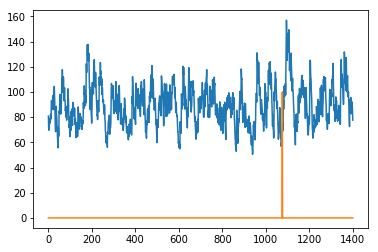

70.2749441322 4.39991
63.6497362962 4.02287
76.3369767168 190.522
72.9843432694 42.8106
92.3193348458 266.334
94.1522916505 110.649
85.4703711345 7.33309
77.3845731206 4.61239
71.1184101391 14.7229
67.5708597441 35.6429
65.0617962306 42.4802
70.0918989562 115.363
66.5096240386 34.2691
73.7793769668 139.207
71.7934257355 53.9199
72.4029732377 77.8889
78.7389637557 135.763
97.5232003147 266.581
89.9413701667 21.7049
82.5008392787 15.5361
86.0369797161 117.862
97.350576056 199.173
90.3405150171 27.25
95.4517149803 141.453
89.694846476 37.883
97.0491533323 163.238
92.660657982 53.1642
92.1040251672 87.0943
86.4881432193 35.9452
77.8496158976 0.10287
71.7276269489 16.6297
64.6332830333 0.784188
71.513289691 133.433
68.7450757273 43.8312
72.8550858243 109.845
73.1386972675 75.6912
76.4584708818 106.336
88.1001878805 192.876
83.3927859748 41.0262
97.2748330609 222.213
115.400599877 278.533
115.344324374 114.838
105.327818439 15.1793
96.0522939612 12.5726
89.8562877401 34.0922
88.1019440613 72

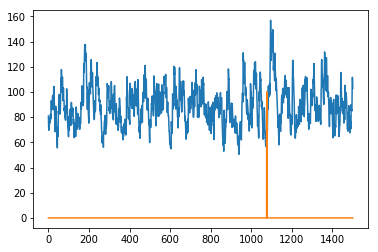

104.604696574 121.001
97.9589089231 38.1468
91.6804893443 35.1747
83.4018956329 8.89455
78.9067416226 38.4504
92.015681413 209.996
85.7137819652 28.9967
87.2758495085 101.334
80.955417115 24.0715
85.0038619147 121.44
83.1707501983 66.6727
77.1510216751 22.9735
69.7521142088 3.16195
69.5876236131 68.1072
65.8553028259 32.2644
74.7270906585 154.573
92.9314995126 256.771
107.329826002 236.915
109.566942279 129.701
101.46835638 28.5811
103.432621511 121.111
110.445502549 173.561
101.604145577 22.0319
103.710637758 122.669
97.2710150981 39.3144
90.9067515705 33.6284
83.0123696721 11.9629
75.096633279 3.85501
81.3191324267 137.322
77.1517955238 39.6458
75.6045816696 61.6797
82.1173504314 140.732
86.3233270276 124.177
77.8694486405 1.78454
85.4839655685 154.015
88.0768547172 111.413
91.9313785655 126.622
82.850419285 1.12179
88.9715571661 144.062
83.1176183455 30.4322
78.4376314133 36.3177
72.4523977443 18.5853
67.6324990038 24.2534
65.2756692389 44.0642
59.2566360312 5.08534
57.5636784981 42

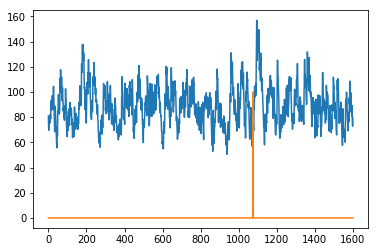

87.9413199628 162.059
108.215480203 290.683
107.457387383 100.635
107.679833306 109.682
106.891833496 99.7998
99.7705788422 35.6793
94.9814646073 51.8794
103.012422761 175.291
111.934480656 192.233
130.739946164 299.989
133.999046335 163.331
124.086552438 34.8741
121.589342049 99.1144
115.126849113 56.9644
105.48590893 18.7174
99.3289119699 43.9159
94.8827254085 54.867
89.7860815145 43.9163
81.1947096244 3.87236
78.4357317498 53.6049
87.4549256036 168.628
82.8397308948 41.303
77.1148451771 25.5909
74.0240794247 46.2072
73.5095079385 68.8784
86.5467346349 203.882
81.6613982533 37.6934
92.6370156301 191.418
92.2998918259 89.2658
88.1961050359 51.262
91.4850783641 121.086
82.5851131464 2.48543
88.9863354133 146.597
81.2974449903 12.0974
78.8691310027 57.0143
78.4292454904 74.4703
80.8627628969 102.764
77.3413093764 45.6482
73.3118594537 37.0468
70.4403395698 44.5967
68.7208222906 53.2452
68.0781685436 62.2943
62.5600034646 12.8965
57.9012435662 15.9724
68.0754243243 159.643
65.2521146037 

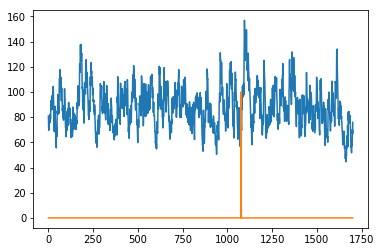

69.7807423382 15.0211
75.5184517958 127.158
74.194803714 62.282
70.8268557065 40.5153
79.0520207828 153.079
77.7267442416 65.7993
78.7569766168 88.0291
78.2133163086 73.3204
78.1979081397 78.0592
82.2427817849 118.647
89.5984917046 155.8
83.3364870394 26.9784
93.3069414239 183.041
95.2830862707 113.068
91.786886332 60.3211
94.9471541502 123.39
85.6103255622 1.57887
80.9712786322 39.2199
95.1113089721 222.372
100.209980321 146.098
98.2889365125 80.9995
105.802013686 173.42
113.153294251 179.315
106.487223249 46.4926
103.753676553 79.1518
105.328765898 119.505
104.335430934 95.3954
106.032299371 121.304
102.047366247 66.183
104.695449447 128.528
97.0318327325 28.0593
97.1224002222 97.9375
97.0850503367 96.7489
101.457589309 140.81
102.561052943 112.492
93.8604602679 15.5551
95.4793062088 110.049
106.849870766 209.185
100.011297493 38.4641
93.4144489781 34.0428
90.8677108064 67.9471
85.7812887706 40.0035
79.1449767957 19.4182
73.187501783 19.5702
75.8620911433 99.9334
70.9994274849 27.235

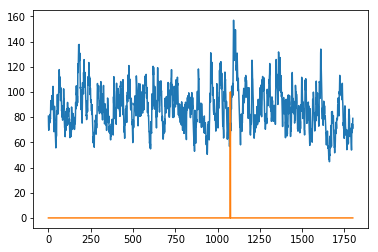

77.7759016794 66.7917
75.2877749361 52.8946
73.4201642058 56.6117
66.7293007775 6.51153
88.6505296353 285.942
99.2852111688 194.997
101.171970203 118.153
96.4499723865 53.952
104.906868764 181.019
100.859072054 64.4289
94.9242196128 41.5105
106.717381148 212.856
105.795665158 97.5002
101.089222956 58.7312
111.159309144 201.79
120.405609675 203.622
110.738284791 23.7324
100.017211215 3.52755
113.511698284 234.962
102.840462815 6.79934
103.998237822 114.418
100.300766945 67.0235
92.2822920803 20.116
91.120649176 80.6659
99.3603939507 173.518
105.601890566 161.775
109.184542086 141.428
100.06666485 18.0058
101.138064619 110.781
107.429342386 164.051
96.7976568429 1.11249
96.8478273768 97.2994
93.9158385234 67.5279
91.5043121967 69.8006
83.4729442591 11.1906
89.5936689372 144.68
97.4970629687 168.628
90.5853954979 28.3804
95.3598668123 138.33
87.0818622898 12.5798
82.8905732623 45.169
86.7567893736 121.553
80.1303064888 20.492
82.2017698585 100.845
78.7566966324 47.751
76.4398209907 55.587

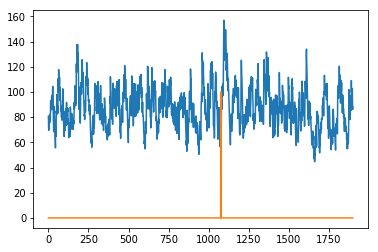

85.4385697952 63.7236
83.7112632612 68.1655
106.130511691 307.904
109.623893627 141.064
99.4013833482 7.39879
114.165184833 247.039
111.651774565 89.0311
114.746237611 142.596
103.897220292 6.25606


KeyboardInterrupt: 

In [35]:
#avg = 300
alpha = 0.9
errors = []
updates = []
dqn.update = 4000
batch_size = 32

for i in range(500000):
    d = replay.sample_minibatch(batch_size)
    e = np.sqrt(dqn.play(d))
    avg = alpha*avg + (1-alpha)*e
    errors.append(avg)
    
    print(avg, e)
    
    if dqn.count%dqn.update == 0:
        updates.append(100)
        print(i)
    else:
        updates.append(0)
     
    if i%100 == 0 and i > 0:
        plt.clf()
        plt.plot(errors)
        plt.plot(updates)
        plt.show()


In [36]:
dqn.count

40834

80

In [1]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/gpu:0']

In [12]:
replay.count

199451